In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)

In [7]:
inspector.get_table_names()

['measurement', 'station']

In [8]:
# reflect an existing database into a new model

# reflect the tables

In [9]:
mea_columns = inspector.get_columns('measurement')
for column in mea_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
sta_columns = inspector.get_columns('station')
for column in sta_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
# We can view all of the classes that automap found


In [14]:
Base = automap_base()

In [15]:
Base.prepare(engine, reflect=True)

In [16]:
Base.classes.keys()

['measurement', 'station']

In [17]:
Measurement = Base.classes.measurement

In [18]:
# Save references to each table


In [19]:
# Create our session (link) from Python to the DB


In [20]:
session = Session(engine)

In [21]:
for row in session.query(Measurement, Measurement.prcp).limit(10).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x7feb66600490>, 0.08)
(<sqlalchemy.ext.automap.measurement object at 0x7feb666006d0>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7feb66600760>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7feb666007c0>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7feb66600820>, None)
(<sqlalchemy.ext.automap.measurement object at 0x7feb66600880>, 0.06)
(<sqlalchemy.ext.automap.measurement object at 0x7feb666008e0>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7feb66600940>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7feb66600430>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7feb666009d0>, 0.01)


# Exploratory Climate Analysis

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# use 365 for 365 days = 12 months
# engine.execute('SELECT * FROM measurement LIMIT 365').fetchall()

In [23]:
results = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).all()

In [24]:
date = [result[1] for result in results[:365]]
prcp = [result[2] for result in results[:365]]

In [25]:
# Calculate the date 1 year ago from the last data point in the database

In [26]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [27]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [28]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [29]:
# Perform a query to retrieve the data and precipitation scores

In [30]:
session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

[('2016-08-23', 'USC00519397', 0.0),
 ('2016-08-23', 'USC00513117', 0.15),
 ('2016-08-23', 'USC00514830', 0.05),
 ('2016-08-23', 'USC00517948', None),
 ('2016-08-23', 'USC00519523', 0.02),
 ('2016-08-23', 'USC00519281', 1.79),
 ('2016-08-23', 'USC00516128', 0.7),
 ('2016-08-24', 'USC00519397', 0.08),
 ('2016-08-24', 'USC00513117', 2.15),
 ('2016-08-24', 'USC00514830', 2.28),
 ('2016-08-24', 'USC00517948', None),
 ('2016-08-24', 'USC00519523', 1.22),
 ('2016-08-24', 'USC00519281', 2.15),
 ('2016-08-24', 'USC00516128', 1.45),
 ('2016-08-25', 'USC00519397', 0.08),
 ('2016-08-25', 'USC00513117', 0.08),
 ('2016-08-25', 'USC00514830', 0.0),
 ('2016-08-25', 'USC00517948', 0.0),
 ('2016-08-25', 'USC00519523', 0.21),
 ('2016-08-25', 'USC00519281', 0.06),
 ('2016-08-25', 'USC00516128', 0.11),
 ('2016-08-26', 'USC00519397', 0.0),
 ('2016-08-26', 'USC00513117', 0.03),
 ('2016-08-26', 'USC00514830', 0.02),
 ('2016-08-26', 'USC00517948', 0.04),
 ('2016-08-26', 'USC00519523', 0.0),
 ('2016-08-26', 'U

In [31]:
count_a_year_ago = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').count()
print(count_a_year_ago)

2230


In [32]:
# date = dt.datetime(2016, 8, 23)

# sel = [Measurement.date, Measurement.station, Measurement.prcp]
# a_year_ago = session.query(*sel).\
#     filter(Measurement.date > date).\
#     group_by(Measurement.station).\
#     order_by(Measurement.date).all()
# a_year_ago

In [33]:
# Save the query results as a Pandas DataFrame and set the index to the date column

In [34]:
stmt = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').statement
df2 = pd.read_sql_query(stmt, session.bind)
df2

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00
...,...,...,...
2225,2017-08-19,USC00516128,0.09
2226,2017-08-20,USC00516128,NaN
2227,2017-08-21,USC00516128,0.56
2228,2017-08-22,USC00516128,0.50


In [35]:
df2.set_index('date', inplace=True, )
df2

,station,prcp
date,,
2016-08-23,USC00519397,0.00
2016-08-24,USC00519397,0.08
2016-08-25,USC00519397,0.08
2016-08-26,USC00519397,0.00
2016-08-27,USC00519397,0.00
...,...,...
2017-08-19,USC00516128,0.09
2017-08-20,USC00516128,NaN
2017-08-21,USC00516128,0.56


In [36]:
# df = original_df.set_index("date")
# df

In [100]:
# Sort the dataframe by date
df3 = df2.sort_values("date")
df3

,id,station,date,prcp,tobs
0,9519,USC00519523,2010-01-01,0.15,75.0
2669,1,USC00519397,2010-01-01,0.08,65.0
8165,9008,USC00518838,2010-01-01,0.21,72.0
17571,14960,USC00511918,2010-01-01,0.05,66.0
10048,16939,USC00516128,2010-01-01,0.14,73.0
...,...,...,...,...,...
5391,2723,USC00519397,2017-08-22,0.00,82.0
2668,12187,USC00519523,2017-08-23,0.08,82.0
12659,19550,USC00516128,2017-08-23,0.45,76.0
5392,2724,USC00519397,2017-08-23,0.00,81.0


In [101]:
# Create a dataframe of the average stats for each type of 
df4_group = df3.groupby(["date"])

df5 = df4_group.mean()
df5

,id,prcp,tobs
date,,,
2010-01-01,9334.285714,0.151429,69.714286
2010-01-02,9335.285714,0.002857,67.000000
2010-01-03,9336.285714,0.000000,74.000000
2010-01-04,9337.285714,0.001429,75.000000
2010-01-05,10893.833333,0.005000,74.500000
...,...,...,...
2017-08-19,10520.500000,0.030000,78.750000
2017-08-20,9967.000000,0.005000,79.666667
2017-08-21,10522.250000,0.193333,79.500000


In [90]:
x_axis = np.arange(len(df5))
tick_locations = [value+0.4 for value in x_axis]

KeyError: 'date'

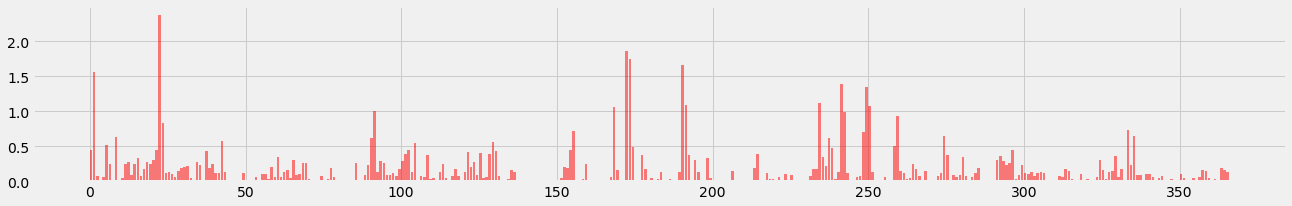

In [91]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, df5["prcp"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, df5["date"], rotation="vertical")

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data

In [ ]:
session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

In [86]:
sel = [Measurement.date, 
       func.avg(Measurement.prcp)]
prcp_averages = session.query(*sel).\
    filter(Measurement.date >= '2016-08-23').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
prcp_averages

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

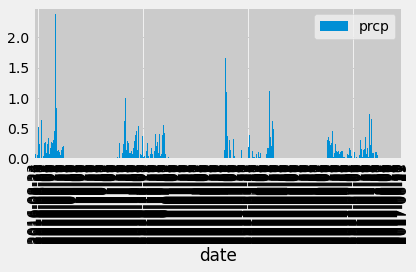

In [87]:
df = pd.DataFrame(prcp_averages, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()

In [39]:
# drop NaN's
df4 = df3.dropna(how='any')

In [88]:
# Create a dataframe for comparison
df4_comp = df4.groupby(["prcp"])

df5 = df4_comp.mean()
df5

DataError: No numeric types to aggregate

In [40]:
# Delete extraneous column
del df4['station']
df4

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [41]:
# fig, ax = plt.subplots()
# ypos = range(1, prcp)
# ax.barh(ypos, prcp)
# ax.set_xlabel("date")
# ax.set_ylabel("prcp")
# ax.set_yticks(ypos)
# ax.set_yticklabels(date[::-1])
# ax.set_title("prcp")
# fig.tight_layout()
# plt.show()

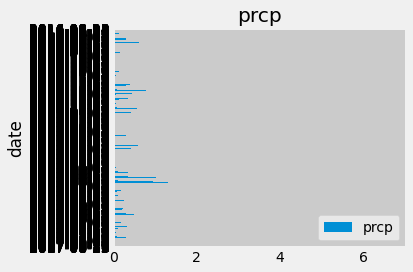

In [57]:
# df4.iloc[::-1].plot.barh(title="prcp")
# plt.tight_layout()
# plt.show()

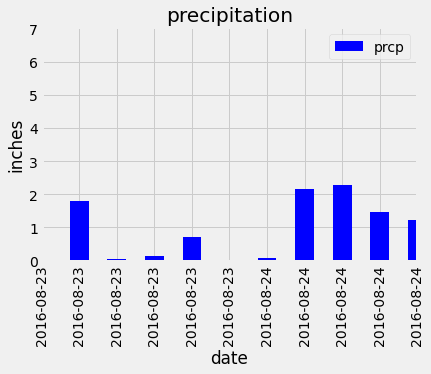

<Figure size 432x288 with 0 Axes>

In [93]:
df4.plot(kind="bar", facecolor="blue")
plt.title("precipitation")
plt.ylabel("inches")
plt.xlabel("date")
plt.xlim(0,10)
plt.show()
plt.tight_layout()

In [70]:
# x_axis = np.arange(len(df4))
# tick_locations = [value for value in x_axis]
# plt.figure(figsize=(20,3))
# plt.bar(x_axis, prcp, color='r', alpha=0.5, align="edge")
# plt.xticks(tick_locations, df4["date"], rotation="vertical")
# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(rain_df["Inches"])+10)
# plt.title("Average Rain per State")
# plt.xlabel("State")
# plt.ylabel("Average Amount of Rainfall in Inches")
# plt.tight_layout()
# plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

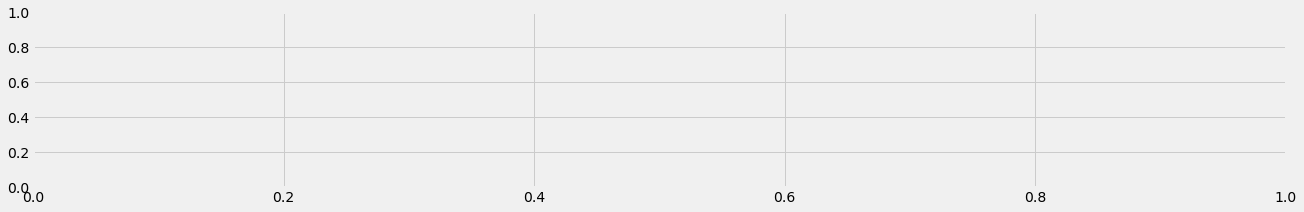

In [71]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, prcp, color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, df4["date"], rotation="vertical")

In [ ]:
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(rain_df["Inches"])+10)
plt.title("Average Rain per State")
plt.xlabel("State")
plt.ylabel("Average Amount of Rainfall in Inches")
plt.tight_layout()
plt.show()

In [ ]:
plt.title("Average Rain per State")
plt.xlabel("State")
plt.ylabel("Average Amount of Rainfall in Inches")

In [ ]:
plt.tight_layout()
plt.show()

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df3.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [44]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Measurement.station)).all()

[(19550)]

In [103]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [48]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [49]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [50]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [51]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [52]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [53]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [54]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [55]:
# Plot the daily normals as an area plot with `stacked=False`
